챕터 5. 지식 그래프를 활용한 그래프 RAG

- 그래프 RAG 개념과 기존 RAG 방식의 한계 이해
- 지식 그래프와 그래프 DB를 활용한 데이터 구조화 및 질의 최적화 방법
- Neo4j와 랭체인을 활용한 그래프 RAG 구현 및 응용

- 이 장에서는 그래프 RAG에 대해 다룸, 먼저 그래프 RAG의 개념과 기존 RAG와의 차이점을 살펴보고, 지식 그래프 구축 방법에 대해 알아봄, 이후 실습을 통해 그래프 RAG 시스템을 실제로 구현하는 방법 학습

1. 그래프 RAG 개요
    - 그래프 RAG는 기존 RAG 시스템의 한계를 극복하기 위해 새롭게 개발된 모델로, 지식 그래프를 활용하여 정보간의 관계를 더 깊이 이해하고 처리하는 방식, 기존 RAG가 문서를 검색하고 정보를 추출하는 데 집중했다면, 그래프 RAG는 복잡한 데이터 간의 연결성을 파악하여 다층적인 질의응답이 가능하도록 함

- 1.1 기존 RAG 방식의 한계
    - 기존의 RAG 방식에는 두 가지 주요 한계점이 있음
        1. 정보 연결의 어려움
            - 기존 RAG는 질문에 답하기 위해 개별 문서에서 정보를 검색할 수 있지만, 데이터 간의 관계를 분석하여 새로운 통찰을 제공하는 데 한계가 있음, 즉 정보 조각을 연결하여 전체적인 의미를 도출하는 능력이 부족, 예를 들어 다음과 같은 질문이 주어졌다고 가정하면
                - 질문: "이 문서의 주요 주제는 무엇인가요?"
            - 이 질문에 대해 기존 RAG 시스템에서는 나뉘어진 개별 문서에서 특정 소주제나 키워드를 검샘 가능, 기업의 사업보고서를 예로 들면, 이 질문을 기존 RAG 시스템에 입력한다면, 한 문서에서 기업의 사업 영역에 대한 내용을 찾고, 다은 문서에서 기업의 재무 상태에 대한 정보를 찾을 수 있음, 그러나 이러한 정보들은 각각 개별적으로 제공될 뿐, 데이터셋 전체에서 이러한 정보들이 어떻게 연결되고 전반적인 패턴이 무엇인지에 대해서는 알지 못함, 따라서 문서 주제와 같이 전체 내용을 아우르는 영역을 파악 하는 데는 한계가 있음
        2. 대규모 데이터 이해의 한계
            - 기존 RAG 시스템은 데이터의 규모가 클수록 개념들을 전체적으로 파악하는 데 어려움을 겪음, 아래 질문이 주어졌다고 생각하면
                - 질문: "지난 10년간의 연간 보고서를 바탕으로 회사의 지속가능성 전략 변화를 설명해 주세요."
            - 질문에 대해, 기존 RAG 시스템은 연간 보고서에서 관련 정보를 검색하여 개별 문서들을 얻을 수 있음, 하지만 이렇게 얻은 개별 문서는 각각 독립적으로 이루어져 있으며, 각 문서 안에 내용들이 다른 문서들과 어떻게 연결되는 지 알 수 없음, 따라서 10년간의 연간 보고서라는 대규모 데이터셋에서 각 정보들이 어떻게 서로 연결되고, 그 속에서 지속가능성 전략이 어떤 식으로 변화해왔는지 추적하는 데는 한계가 있음
            - 이를 해결하기 위해 그래프 RAG 가 제안됨, 그래프 RAG는 전체 텍스트 코퍼스에 대한 질문에 답하기 위해 지식 그래프와 검색 증강 생성을 결합한 접근 방식, 그래프 RAG는 지식 그래프를 활용해 개별 정보 조각들 간의 관계를 모델링함으로써, 데이터셋 전체에서 연결성솨 패턴을 파악 가능, 또한 대규모 데이터셋의 구조적 관계를 분석함으로써, 시간 경과에 따른 변화나 전체적인 개념을 더 효과적으로 이해할 수 있음

- 1.2 지식 그래프란?
    - 그래프는 "네트워크 구조를 수학적으로 표현한 모델"로 상호 연결된 요소들 간의 관계를 나타내는 구조, 여기서 네트워크란 우리 주변에서 흔히 볼 수 있는 "상호 연결된 시스템"을 말함, 네트워크는 우리 일상 곳곳에 존재, 예를 들어 우리가 매일 사용하는 소셜 미디어 플랫폼은 거대한 소셜 네트워크, 페이스북이나 인스타그램에서 사용자들은 서로 "친구"를 맺거나 "팔로우"를 하며 관계를 맺음, 이러한 관계들이 모야 하나의 큰 네트워크를 이룸
    - 또 다른 예로 교통 시스템을 들 수 있음, 도시들은 도로, 철도, 항공로 등으로 서로 연결되어 있음, 이 연결망은 사람과 물자가 이동할 수 있는 교통 네트워크를 형성, 인터넷 연시 대표적인 네트워크의 예, 전 세계 컴퓨터와 서버들이 서로 연결되어 정보를 주고받는 거대한 시스템을 형성
    - 이러한 네트워크들의 공통점은 모두 "개체"와 그들 사이의 "관계"로 구성되어 있다는 점, 소셜 네트워크에서는 사람들이 개체이고, 그들 사이의 친구 관계나 팔로우가 연결 요소, 교통 네트워크에서는 도시가 개체이고, 도로나 철도가 그 사이의 연결 역할을 함, 인터넷에서는 컴퓨터나 서버가 개체이고, 데이터 전송 경로가 연결 요소로 작용
    - 이러한 현실 세계의 네트워크 구조를 수학적으로 표현하고 분석하기 위해 그래프라는 모델을 사용, 그래프에서는 맥락에 따라 용어가 다양하게 사용, 수학적 맥락에서는 주로 노드(정점)와 에지(간선)라는 용어를 사용하고, 응용 분야에서는 개체와 관계로 표현하는 경향이 있음
    - 특히 그래프는 단순한 연결 구조뿐만 아니라, 방향성과 가중치도 표현 가능, 예를 들어 SNS의 팔로우 관계처럼 한쪽에서 다른 쪽으로 향하는 단방향 연결을 나타낼 수 있으며, 교통 네트워크에서 도시 간 거리처럼 연결 강도나 관계의 중요도를 반영하는 가중치를 추가할 수도 있음
    - 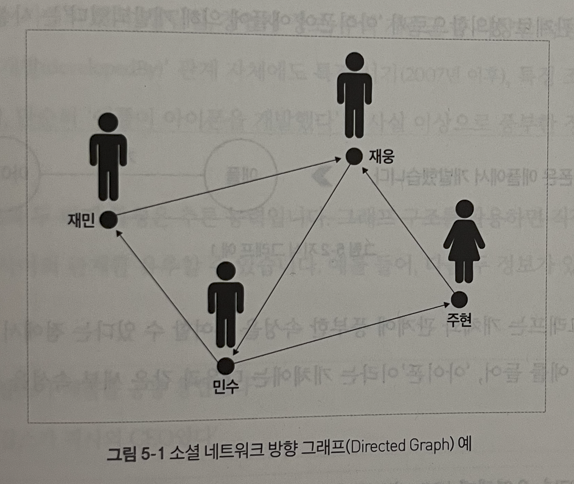

    - 결론적으로, 그래프는 네트워크를 수학적으로 표현하는 모델이며, 이를 통해 복잡한 시스템의 구조를 명확하게 모델링하고 다양한 수학적 기법을 적용하여 네트워크의 특성을 분석할 수 있음
    - 이러한 기본적인 그래프 개념을 바탕으로 지식 그래프는 정보와 지식을 보다 구조화하여 표현하는 특별한 형태의 그래프로 확장, 일반적인 그래프는 노드와 에지로 구성되며, 개체나 그들 간의 연결 구조를 나타내는 데 초점을 둠, 하지만 개체와 관계의 구체적인 의미나 속성에 중점을 두지 않고, 단순히 "연결되어 있다" 는 사실만을 표현하는 경우가 많음
    - 반면, 지식 그래프는 개체와 관계에 의미론적 정보를 부여하여 각 요소가 무엇을 의미하는 지 명확하게 정의, 즉 지식 그래프는 일반 그래프의 기본 구조 위에 의미를 추가하여 정보를 보다 구체적으로 구조화하여 표현, 예를 들어 "아이폰"과 "애플"이라는 두 개체를 생각해 보면, 일반 그래프에서는 이 둘이 단순히 연결선으로 이어져 있을 뿐이지만, 지식 그래프에서는 이 연결을 "개발"이라는 명확한 관계로 정의함으로써 "아이폰이 애플에 의해 개발되었다"는 사실을 구체적으로 나타냄
    - 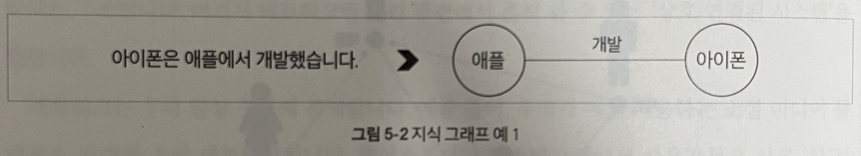

    - 또한 지식 그래프는 개체와 관계에 풍부한 속성을 부여할 수 있다는 점에서 일반 그래프와 차별화됨, 예를 들어, "아이폰"이라는 개체에는 다음롸 같은 세부 속성을 추가 가능
        - 출시일: 2007년, 운영체제: iOS, 디스플레이: 3.5인치
    - 마찬가지로, "개발"이라는 관계 자체에도 다음과 같은 속성을 추가할 수 있음
        - 개발 시기: 2007년 이후, 개발 조건: iOS 기반
    - 이러한 구조 덕분에 지식 그래프는 일반 그래프와 다른 여러 특징을 지니고 있음